In [1]:
%cd ..

/home/jovyan/work/spectrum/c_final/v1


In [2]:
import pandas as pd
import numpy as np
import base
import os

2024-02-27 09:36:36.529430: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 09:36:36.565891: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 09:36:36.565923: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 09:36:36.566834: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 09:36:36.572926: I tensorflow/core/platform/cpu_feature_guar

In [3]:
SEED = 42
base.fix_seed(SEED)

desired_directory = '/home/jovyan/work/spectrum/'
os.chdir(desired_directory)

In [4]:
df_pos = pd.read_csv('Data/03_model/pos/df_pos_model_pred_result.csv')
df_pos['NP'] = "Positive"
df_neg = pd.read_csv('Data/03_model/neg/df_neg_model_pred_result.csv').rename(columns={'Non predict':'Non predicted'})
df_neg['NP'] = "Negative"

df_all = pd.concat([df_pos, df_neg], axis=0)

In [4]:
df_all['1stpred_r']= (df_all['1st pred'] / df_all['Sample number'])*100
df_all['Candidate_r']= (df_all['Candidate'] / df_all['Sample number'])*100
df_all['Nonpredicted_r']= (df_all['Non predicted']/ df_all['Sample number'])*100

replace_dict = {'Different curator(Sciex TripleTOF 6600)': 'Different curators (Sciex TripleTOF 6600)',\
                'Different version(Sciex TripleTOF 5600+)': 'Different versions (Sciex TripleTOF 5600+)',\
                'Different marchine(total)': 'Different equipment (Total)',\
                'Sciex TripleTOF 6600(SWATH)' : 'Sciex TripleTOF 6600 (SWATH)'  
                    }
df_all['Name'] = df_all['Name'].replace(replace_dict)
df_all_neg = df_all.query('NP == "Negative"')[['Name','Sample number','1stpred_r','Candidate_r','Nonpredicted_r']]
df_all_pos = df_all.query('NP == "Positive"')[['Name','Sample number','1stpred_r','Candidate_r','Nonpredicted_r']]

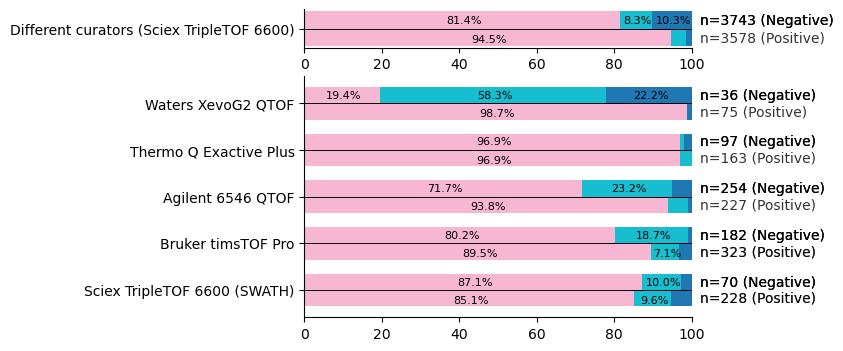

In [17]:
import matplotlib.pyplot as plt
import numpy as np

cl = plt.cm.tab20.colors
deep_palette = [cl[13], cl[18], cl[0]]
fig, ax = plt.subplots(2,1,figsize=(5,4), gridspec_kw={'height_ratios': [0.8,5]})

### 1
width = 0.35  # Width of each bar

df_all_neg1 = df_all_neg.iloc[:1, :]
df_all_pos1 = df_all_pos.iloc[:1, :]
y1 = np.arange(len(df_all_neg1))

ax[0].barh(y1 - width/2, df_all_neg1['1stpred_r'], width, label='1st_pred', color=deep_palette[0])
ax[0].barh(y1 - width/2, df_all_neg1['Candidate_r'], width, label='candidate', color=deep_palette[1], left=df_all_neg1['1stpred_r'])
ax[0].barh(y1 - width/2, df_all_neg1['Nonpredicted_r'], width, label='mis', color=deep_palette[2], left=df_all_neg1['1stpred_r']+df_all_neg1['Candidate_r'])
ax[0].barh(y1 + width/2, df_all_pos1['1stpred_r'], width, label='1st_pred', color=deep_palette[0])
ax[0].barh(y1 + width/2, df_all_pos1['Candidate_r'], width, label='candidate', color=deep_palette[1], left=df_all_pos1['1stpred_r'])
ax[0].barh(y1 + width/2, df_all_pos1['Nonpredicted_r'], width, label='mis', color=deep_palette[2], left=df_all_pos1['1stpred_r']+df_all_pos1['Candidate_r'])

bars1 = df_all_neg1[['1stpred_r','Candidate_r','Nonpredicted_r']]
bars2 = df_all_pos1[['1stpred_r','Candidate_r','Nonpredicted_r']]

for n in bars1:
    for i, (cs, ab, pc, sn) in enumerate(zip(bars1.iloc[:, 0:].cumsum(1)[n],
                                          bars1[n], bars1[n],df_all_neg1['Sample number'])):
        if pc > 7.0:  # 0.0% のとき表示しない
            ax[0].text(cs - ab / 2 + 0.5, i - width/2, str(np.round(pc, 1)) + '%',
                     va='center', ha='center', rotation=0, fontsize=8)
        ax[0].text(100 + 2, i - width/2, f'n={sn} (Negative)', va='center', ha='left', fontsize=10, alpha=0.8)

for n in bars2:
    for i, (cs, ab, pc, sn) in enumerate(zip(bars2.iloc[:, 0:].cumsum(1)[n],
                                          bars2[n], bars2[n],df_all_pos1['Sample number'])):
        if pc > 7.0:  # 0.0% のとき表示しない
            ax[0].text(cs - ab / 2 + 0.5, i + width/2 + 0.04, str(np.round(pc, 1)) + '%',
                     va='center', ha='center', rotation=0, fontsize=8)
            ax[0].text(100 + 2, i + width/2, f'n={sn} (Positive)', va='center', ha='left', fontsize=10, alpha=0.8)
            

for i in range(len(df_all_pos1)):
    ax[0].axhline(i, color='black', linewidth=0.7)

ax[0].set_ylabel('', fontsize=14) 
ax[0].set_title('', fontsize=18)
ax[0].invert_yaxis()
ax[0].set_yticks(y1)
ax[0].set_yticklabels(df_all_pos1['Name'], fontsize=10)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_xlim(0, 100)

### 2
df_all_neg2 = df_all_neg.iloc[1:, :]
df_all_pos2 = df_all_pos.iloc[1:, :]
y2 = np.arange(len(df_all_neg2))

ax[1].barh(y2 - width/2, df_all_neg2['1stpred_r'], width, label='1st_pred', color=deep_palette[0])
ax[1].barh(y2 - width/2, df_all_neg2['Candidate_r'], width, label='candidate', color=deep_palette[1], left=df_all_neg2['1stpred_r'])
ax[1].barh(y2 - width/2, df_all_neg2['Nonpredicted_r'], width, label='mis', color=deep_palette[2], left=df_all_neg2['1stpred_r']+df_all_neg2['Candidate_r'])
ax[1].barh(y2 + width/2, df_all_pos2['1stpred_r'], width, label='1st_pred', color=deep_palette[0])
ax[1].barh(y2 + width/2, df_all_pos2['Candidate_r'], width, label='candidate', color=deep_palette[1], left=df_all_pos2['1stpred_r'])
ax[1].barh(y2 + width/2, df_all_pos2['Nonpredicted_r'], width, label='mis', color=deep_palette[2], left=df_all_pos2['1stpred_r']+df_all_pos2['Candidate_r'])

bars1= df_all_neg2[['1stpred_r','Candidate_r','Nonpredicted_r']]
bars2= df_all_pos2[['1stpred_r','Candidate_r','Nonpredicted_r']]

for n in bars1:
    for i, (cs, ab, pc, sn) in enumerate(zip(bars1.iloc[:, 0:].cumsum(1)[n],
                                          bars1[n], bars1[n],df_all_neg2['Sample number'].astype(str))):
        if pc > 7.0:  # 0.0% のとき表示しない
            ax[1].text(cs - ab / 2 + 0.5, i - width/2, str(np.round(pc, 1)) + '%',
                     va='center', ha='center', rotation=0, fontsize=8)
        ax[1].text(100 + 2, i - width/2, f'n={sn} (Negative)', va='center', ha='left', fontsize=10, alpha=0.8)

for n in bars2:
    for i, (cs, ab, pc, sn) in enumerate(zip(bars2.iloc[:, 0:].cumsum(1)[n],
                                          bars2[n], bars2[n],df_all_pos2['Sample number'].astype(str))):
        if pc > 7.0:  # 0.0% のとき表示しない
            ax[1].text(cs - ab / 2 + 0.5, i + width/2  + 0.04, str(np.round(pc, 1)) + '%',
                     va='center', ha='center', rotation=0, fontsize=8)
            ax[1].text(100 + 2, i + width/2 , f'n={sn} (Positive)', va='center', ha='left', fontsize=10, alpha=0.8)
            

for i in range(len(df_all_pos2)):
    ax[1].axhline(i, color='black', linewidth=0.7)

ax[1].set_ylabel('', fontsize=14) 
ax[1].set_title('', fontsize=18)
ax[1].invert_yaxis()
ax[1].set_yticks(y2)
ax[1].set_yticklabels(df_all_pos2['Name'], fontsize=10)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_xlim(0, 100)

plt.savefig('Data/svg/test/rikenlipidomics/all_rikentest_bar.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()